In [1]:
import pandas as pd
import numpy as np
import itertools
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
import plotly.tools as tls
py.sign_in('AbhishekMalali', 'rwqa8v03mr')
from plotly.graph_objs import *
%matplotlib inline

#### Loading the data for the 2012-13 Season

In [2]:
features12 = pd.read_pickle('../Data/features12-13.pkl')
tr_features12 = features12.transpose()

In [3]:
#Splitting the smoothed_value_list into 38 new columns
split_fn = lambda x: pd.Series([i for i in x])
tr_features12_sm = tr_features12['smoothed_value_list'].apply(split_fn)

In [4]:
#Splitting the cum_value_list into 38 new columns
tr_features12_cm = tr_features12['cum_value_list'].apply(split_fn)

In [5]:
#Generating column names for the new dataframe
col_names_sm = []
col_names_cm = []
for i in range(38):
    col_names_sm.append('smooth_value_week_'+str(i+1))
    col_names_cm.append('cuml_value_week_'+str(i+1))

In [6]:
#Setting the column names for the new dataframe
tr_features12_sm.columns = col_names_sm
tr_features12_cm.columns = col_names_cm

In [7]:
#Concatenating the two dataframes
df_features12 = pd.concat([tr_features12,tr_features12_sm,tr_features12_cm],axis=1)

In [8]:
#Selecting columns to be clustered
columns_cluster = [[u'avg_value'], [u'avg_value_smoothed'],
        [u'nassists'], [u'naway_assists'], [u'naway_goals'],
        [u'nearly_assists'], [u'nearly_goals'], [u'nequalizer_assists'],
        [u'nequalizer_goals'], [u'ngoals'], [u'nhome_assists'], [u'nhome_goals'],
        [u'nlate_assists'], [u'nlate_goals'], [u'nmid_assists'], [u'nmid_goals'],
        [u'nsub_assists'], [u'nsub_goals'], [u'ntiebreaker_assists'],
        [u'ntiebreaker_goals'], [u'season_value'],col_names_sm, col_names_cm]
columns_cluster = list(itertools.chain(*columns_cluster))

In [9]:
#Creating a new dataframe to be used for clustering
df_clustering = df_features12[columns_cluster]

In [10]:
df_clustering.head()

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,...,cuml_value_week_29,cuml_value_week_30,cuml_value_week_31,cuml_value_week_32,cuml_value_week_33,cuml_value_week_34,cuml_value_week_35,cuml_value_week_36,cuml_value_week_37,cuml_value_week_38
Aaron Hunt,1.142434,1.19568,4,0,5,0,3,0,2,11,...,40.4125,40.4125,40.4125,43.4125,43.4125,43.4125,43.4125,43.4125,43.4125,43.4125
Aaron Lennon,0.6901316,0.5942928,7,2,1,1,1,1,0,4,...,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,26.2250
Aaron Ramsey,0.1848684,0.1690789,2,2,0,1,0,0,0,1,...,3.1625,6.0250,6.0250,6.0250,6.0250,6.0250,6.0250,6.0250,7.0250,7.0250
Abdelaziz Barrada,0.7023026,0.7875164,6,1,2,1,0,1,2,4,...,23.6875,23.6875,23.6875,23.6875,23.6875,26.6875,26.6875,26.6875,26.6875,26.6875
Abdou TraorÃ©,0.01973684,0.003947368,1,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7500


#### Clustering the data using K-Means

In [11]:
n_clusters = 10
km = skc.KMeans(n_clusters=n_clusters)
km.fit(df_clustering.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Counting the number of players in every cluster

In [12]:
for cl_idx in range(10):
    print "Number of players in Cluster no. "+str(cl_idx)+":",\
                    sum(km.labels_ == cl_idx)

Number of players in Cluster no. 0: 645
Number of players in Cluster no. 1: 87
Number of players in Cluster no. 2: 155
Number of players in Cluster no. 3: 59
Number of players in Cluster no. 4: 2
Number of players in Cluster no. 5: 137
Number of players in Cluster no. 6: 124
Number of players in Cluster no. 7: 6
Number of players in Cluster no. 8: 411
Number of players in Cluster no. 9: 37


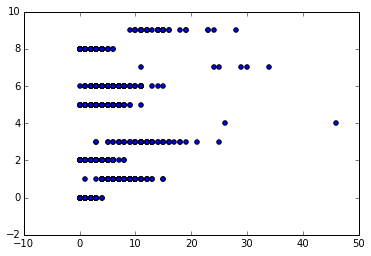

In [18]:
plt.scatter(df_clustering['ngoals'],km.labels_)

#### Visualizing results

In [14]:
results = pd.DataFrame([df_clustering.index,km.labels_,df_clustering.season_value,\
                       df_clustering.ngoals,df_clustering.nassists,\
                       df_clustering.ntiebreaker_goals, df_clustering.ntiebreaker_assists]).T
results.columns = ['Player','Cluster','Value','Goals','Assists','TGoals', 'TAssists']

In [15]:
results[results['Player'] == 'Gareth Bale']

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
544,Gareth Bale,3,64.05,21,4,10,2


In [17]:
results[results['Cluster'] == 3]

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
15,Adam Le Fondre,3,45.7875,12,2,2,0
29,Agirretxe,3,47.05,13,6,6,2
43,Alejandro GÃ³mez,3,40.3625,8,8,6,5
47,Alessandro Diamanti,3,34.6625,7,7,2,2
66,Alexander Meier,3,36.6,16,2,6,0
111,AndrÃ© SchÃ¼rrle,3,38.0875,11,7,5,5
112,AndrÃ©-Pierre Gignac,3,50.55,13,0,12,0
121,Anthony Modeste,3,42.0875,15,3,5,2
130,Antonio Cassano,3,40.975,8,9,2,5
149,Arouna KonÃ©,3,40.2,11,5,4,3


In [19]:
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

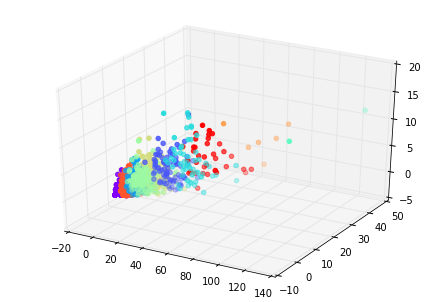

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
cluster_idx = 0
for c in colors:
    ax.scatter(results['Value'][results['Cluster'] == cluster_idx],\
                results['Goals'][results['Cluster'] == cluster_idx],
            zs=results['Assists'][results['Cluster'] == cluster_idx],\
                color=c)
    cluster_idx += 1

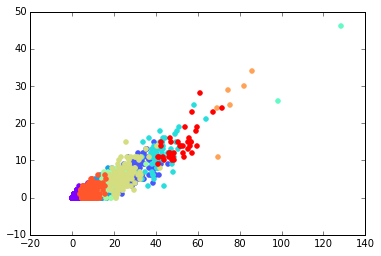

In [21]:
cluster_idx = 0
for c in colors:
    plt.scatter(results['Value'][results['Cluster'] == cluster_idx],\
                results['Goals'][results['Cluster'] == cluster_idx],\
                color=c)
    cluster_idx += 1

In [22]:
# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = Layout(
    title='Cluster Distribution', # set plot title
    scene=Scene(  # (!) axes are part of a 'scene' in 3d plots
        xaxis=XAxis(axis,title='Assists'), # set x-axis style
        yaxis=YAxis(axis,title='Goals'), # set y-axis style
        zaxis=ZAxis(axis,title='Season Value')  # set z-axis style
    )
)

In [23]:
cluster_idx=0
trace_list = []
for c in range(n_clusters):
    trace = Scatter3d(
        z=np.array(results['Value'][results['Cluster'] == c].astype(float)),
        x=np.array(results['Assists'][results['Cluster'] == c].astype(float)),
        y=np.array(results['Goals'][results['Cluster'] == c].astype(float)),
        name = "Cluster" + str(c),
        text= results['Player'][results['Cluster'] == c].astype(unicode),
        mode='markers')
    trace_list.append(trace)
data = Data(trace_list)

In [24]:
# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='s8_surface')

#### Analyzing data for 2013-14 Season

In [54]:
features13 = pd.read_pickle('../Data/features13-14.pkl')
tr_features13 = features13.transpose()
#Splitting the smoothed_value_list into 38 new columns
split_fn = lambda x: pd.Series([i for i in x])
tr_features13_sm = tr_features13['smoothed_value_list'].apply(split_fn)
#Splitting the cum_value_list into 38 new columns
tr_features13_cm = tr_features13['cum_value_list'].apply(split_fn)

In [55]:
#Generating column names for the new dataframe
col_names_sm = []
col_names_cm = []
for i in range(38):
    col_names_sm.append('smooth_value_week_'+str(i+1))
    col_names_cm.append('cuml_value_week_'+str(i+1))
#Setting the column names for the new dataframe
tr_features13_sm.columns = col_names_sm
tr_features13_cm.columns = col_names_cm

In [56]:
#Concatenating the two dataframes
df_features13 = pd.concat([tr_features13,tr_features13_sm,tr_features13_cm],axis=1)

In [57]:
#Selecting columns to be clustered
columns_cluster = [[u'avg_value'], [u'avg_value_smoothed'],
        [u'nassists'], [u'naway_assists'], [u'naway_goals'],
        [u'nearly_assists'], [u'nearly_goals'], [u'nequalizer_assists'],
        [u'nequalizer_goals'], [u'ngoals'], [u'nhome_assists'], [u'nhome_goals'],
        [u'nlate_assists'], [u'nlate_goals'], [u'nmid_assists'], [u'nmid_goals'],
        [u'nsub_assists'], [u'nsub_goals'], [u'ntiebreaker_assists'],
        [u'ntiebreaker_goals'], [u'season_value'],col_names_sm, col_names_cm]
columns_cluster = list(itertools.chain(*columns_cluster))
#Creating a new dataframe to be used for clustering
df_clustering = df_features13[columns_cluster]
df_clustering = df_clustering.dropna(axis=0)

In [58]:
df_clustering.head(5)

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,...,cuml_value_week_29,cuml_value_week_30,cuml_value_week_31,cuml_value_week_32,cuml_value_week_33,cuml_value_week_34,cuml_value_week_35,cuml_value_week_36,cuml_value_week_37,cuml_value_week_38
Aaron Hughes,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
Aaron Hunt,0.8835526,0.8835526,7,4,3,2,0,1,3,7,...,20.2125,20.2125,22.9625,26.4125,30.4125,33.575,33.5750,33.5750,33.5750,33.5750
Aaron Lennon,0.1638158,0.1493421,4,2,0,0,0,0,0,1,...,2.6125,2.6125,2.6125,2.6125,2.6125,3.475,6.2250,6.2250,6.2250,6.2250
Aaron Ramsey,0.9121711,0.8631195,7,5,7,1,1,0,0,10,...,26.9000,26.9000,26.9000,26.9000,26.9000,26.900,31.2125,31.2125,31.2125,34.6625
AarÃ³n,0.1059211,0.1059211,1,1,1,0,0,1,0,1,...,4.0250,4.0250,4.0250,4.0250,4.0250,4.025,4.0250,4.0250,4.0250,4.0250


#### Clustering using K-Means

In [59]:
n_clusters = 10
km = skc.KMeans(n_clusters=n_clusters)
km.fit(df_clustering.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Counting the number of players in every cluster

In [60]:
for cl_idx in range(10):
    print "Number of players in Cluster no. "+str(cl_idx)+":",\
                    sum(km.labels_ == cl_idx)

Number of players in Cluster no. 0: 165
Number of players in Cluster no. 1: 55
Number of players in Cluster no. 2: 404
Number of players in Cluster no. 3: 74
Number of players in Cluster no. 4: 50
Number of players in Cluster no. 5: 20
Number of players in Cluster no. 6: 457
Number of players in Cluster no. 7: 166
Number of players in Cluster no. 8: 73
Number of players in Cluster no. 9: 178


In [61]:
results = pd.DataFrame([df_clustering.index,km.labels_,df_clustering.season_value,\
                       df_clustering.ngoals,df_clustering.nassists,\
                       df_clustering.ntiebreaker_goals, df_clustering.ntiebreaker_assists]).T
results.columns = ['Player','Cluster','Value','Goals','Assists','TGoals', 'TAssists']

In [62]:
results[results['Player'] == 'Gareth Bale']

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
525,Gareth Bale,1,46.2475,15,12,4,3


In [65]:
results[results['Cluster'] == 4]

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
1,Aaron Hunt,4,33.575,7,7,2,4
15,Adam Johnson,4,29.65,8,6,3,1
42,Alberto Paloschi,4,38.7375,13,1,6,1
70,Alexander Meier,4,28.2625,8,2,3,2
120,Antonio Di Natale,4,44.8,16,1,8,1
159,Bafetimbi Gomis,4,31.9,14,1,5,0
165,Barral,4,23.3625,7,0,4,0
177,Benjamin AndrÃ©,4,26.9375,4,5,3,3
261,Christian Eriksen,4,38.675,7,9,2,6
283,Claudio Pizarro,4,38.335,10,3,3,1
